In [1]:
# Requirements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"]=[18.0,10.0]
plt.style.use("ggplot")
import re
import string
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

In [2]:
#Descarga Base de Datos
discursos = pd.read_csv("DISCURSOS1.csv", sep = ";")

In [3]:
#Base de Datos
discursos

,LUGAR,ESTADO,PAIS,Dia,Mes,Ano,MINUTOS,SEGUNDOS,TITULO,TEXTO
0,Brasília,DF,BRASIL,1,1,2019,9.0,42.0,"Discurso do Presidente da República, Jair Bols...",Excelentíssimo presidente do Congresso Naciona...
1,Brasília,DF,BRASIL,1,1,2019,8.0,53.0,"Discurso do Presidente da República, Jair Bols...","Meu prezado general,\n\n Paula,\n\n..."
2,Brasília,DF,BRASIL,2,1,2019,8.0,37.0,"Discurso do Presidente da República, Jair Bols...","Não precisava falar, mas hierarquia, disciplin..."
3,Brasília,DF,BRASIL,7,1,2019,8.0,47.0,"Discurso do Presidente da República, Jair Bols...","Senhor vice-presidente,\n\nSenhores ministros,..."
4,Brasília,DF,BRASIL,15,1,2019,NaN,NaN,"Discurso do Presidente da República, Jair Bols...",Como o povo soberanamente decidiu por ocasião ...
5,Brasília,DF,BRASIL,16,1,2019,4.0,55.0,Declaração à Imprensa do Presidente da Repúbli...,"Temos grande satisfação de receber, já nesse i..."
6,Brasília,DF,BRASIL,16,1,2019,3.0,47.0,"Brinde do Presidente da República, Jair Bolson...","Mauricio Macri, presidente da Argentina,\n\nO ..."
7,Davos,NaN,SUIZA,22,1,2019,6.0,37.0,"Discurso do presidente da República, Jair Bols...",Confesso que estou emocionado e me sinto muito...
8,Brasília,DF,BRASIL,25,1,2019,NaN,NaN,Declaração à imprensa do Presidente da Repúbli...,"Boa tarde, chegamos pela manhã de Davos, Suíça..."
9,Brasília,DF,BRASIL,19,2,2019,4.0,48.0,"Discurso do Presidente da República, Jair Bols...",Boa noite a todos.\n\nÉ motivo de satisfação e...


In [4]:
len(discursos)

63

In [5]:
#Agregar columna fecha de Pandas
discursos['Ano'] = pd.to_numeric(discursos['Ano'], errors = "coerce")
discursos['Mes'] = pd.to_numeric(discursos['Mes'], errors = "coerce")
discursos['Dia'] = pd.to_numeric(discursos['Dia'], errors = "coerce")

In [6]:
# Format date as datetime object
discursos['Fecha'] = pd.to_datetime(discursos.Ano * 10000 + discursos.Mes * 100 + discursos.Dia, format='%Y%m%d')

In [7]:
discursos

,LUGAR,ESTADO,PAIS,Dia,Mes,Ano,MINUTOS,SEGUNDOS,TITULO,TEXTO,Fecha
0,Brasília,DF,BRASIL,1,1,2019,9.0,42.0,"Discurso do Presidente da República, Jair Bols...",Excelentíssimo presidente do Congresso Naciona...,2019-01-01
1,Brasília,DF,BRASIL,1,1,2019,8.0,53.0,"Discurso do Presidente da República, Jair Bols...","Meu prezado general,\n\n Paula,\n\n...",2019-01-01
2,Brasília,DF,BRASIL,2,1,2019,8.0,37.0,"Discurso do Presidente da República, Jair Bols...","Não precisava falar, mas hierarquia, disciplin...",2019-01-02
3,Brasília,DF,BRASIL,7,1,2019,8.0,47.0,"Discurso do Presidente da República, Jair Bols...","Senhor vice-presidente,\n\nSenhores ministros,...",2019-01-07
4,Brasília,DF,BRASIL,15,1,2019,NaN,NaN,"Discurso do Presidente da República, Jair Bols...",Como o povo soberanamente decidiu por ocasião ...,2019-01-15
5,Brasília,DF,BRASIL,16,1,2019,4.0,55.0,Declaração à Imprensa do Presidente da Repúbli...,"Temos grande satisfação de receber, já nesse i...",2019-01-16
6,Brasília,DF,BRASIL,16,1,2019,3.0,47.0,"Brinde do Presidente da República, Jair Bolson...","Mauricio Macri, presidente da Argentina,\n\nO ...",2019-01-16
7,Davos,NaN,SUIZA,22,1,2019,6.0,37.0,"Discurso do presidente da República, Jair Bols...",Confesso que estou emocionado e me sinto muito...,2019-01-22
8,Brasília,DF,BRASIL,25,1,2019,NaN,NaN,Declaração à imprensa do Presidente da Repúbli...,"Boa tarde, chegamos pela manhã de Davos, Suíça...",2019-01-25
9,Brasília,DF,BRASIL,19,2,2019,4.0,48.0,"Discurso do Presidente da República, Jair Bols...",Boa noite a todos.\n\nÉ motivo de satisfação e...,2019-02-19


In [8]:
discursos.Fecha[0:3]

0   2019-01-01
1   2019-01-01
2   2019-01-02
Name: Fecha, dtype: datetime64[ns]

In [9]:
# Agregando caracteres especiales
puntuacion = string.punctuation + '–¡¿”“•\r´,'
puntuacion

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~–¡¿”“•\r´,'

In [10]:
# Quitando la puntuación en los strings

def no_punct(string):
    transtable = string.maketrans('', '', puntuacion)
    return string.translate(transtable)

In [11]:
discursos['sin_punt'] = discursos['TEXTO '].apply(no_punct)

In [12]:
discursos.sin_punt[0]

'Excelentíssimo presidente do Congresso Nacional senador Eunício Oliveira\n\nSenhoras e senhores chefes de Estado chefes de Governo vicechefes de Estado e vicechefes de Governo que me honram com suas presenças\n\nVicepresidente da República Federativa do Brasil Hamilton Mourão meu contemporâneo de Academia Militar de Agulhas Negras\n\nPresidente da Câmara dos Deputados prezado amigo e companheiro deputado Rodrigo Maia\n\nExpresidentes da República Federativa do Brasil senhor José Sarney senhor Fernando Collor de Mello\n\nPresidente do Supremo Tribunal Federal ministro Dias Toffoli\n\nSenhoras e senhores ministros de Estado e comandantes das Forças aqui presentes\n\nProcuradoraGeral da República Raquel Dodge\n\nSenhoras e senhores governadores\n\nSenhoras e senhores senadores e deputados federais\n\nSenhoras e senhores chefes de missões estrangeiras acreditados junto ao governo brasileiro\n\nMinha querida esposa Michelle daqui vizinha Ceilândia\n\nMeus filhos e familiares aqui presentes

In [13]:
#Removiendo \n
discursos = discursos.replace("\n"," ", regex=True)

In [14]:
discursos

,LUGAR,ESTADO,PAIS,Dia,Mes,Ano,MINUTOS,SEGUNDOS,TITULO,TEXTO,Fecha,sin_punt
0,Brasília,DF,BRASIL,1,1,2019,9.0,42.0,"Discurso do Presidente da República, Jair Bols...",Excelentíssimo presidente do Congresso Naciona...,2019-01-01,Excelentíssimo presidente do Congresso Naciona...
1,Brasília,DF,BRASIL,1,1,2019,8.0,53.0,"Discurso do Presidente da República, Jair Bols...","Meu prezado general, Paula, ...",2019-01-01,Meu prezado general Paula ...
2,Brasília,DF,BRASIL,2,1,2019,8.0,37.0,"Discurso do Presidente da República, Jair Bols...","Não precisava falar, mas hierarquia, disciplin...",2019-01-02,Não precisava falar mas hierarquia disciplina ...
3,Brasília,DF,BRASIL,7,1,2019,8.0,47.0,"Discurso do Presidente da República, Jair Bols...","Senhor vice-presidente, Senhores ministros, ...",2019-01-07,Senhor vicepresidente Senhores ministros Aut...
4,Brasília,DF,BRASIL,15,1,2019,NaN,NaN,"Discurso do Presidente da República, Jair Bols...",Como o povo soberanamente decidiu por ocasião ...,2019-01-15,Como o povo soberanamente decidiu por ocasião ...
5,Brasília,DF,BRASIL,16,1,2019,4.0,55.0,Declaração à Imprensa do Presidente da Repúbli...,"Temos grande satisfação de receber, já nesse i...",2019-01-16,Temos grande satisfação de receber já nesse in...
6,Brasília,DF,BRASIL,16,1,2019,3.0,47.0,"Brinde do Presidente da República, Jair Bolson...","Mauricio Macri, presidente da Argentina, O se...",2019-01-16,Mauricio Macri presidente da Argentina O senh...
7,Davos,NaN,SUIZA,22,1,2019,6.0,37.0,"Discurso do presidente da República, Jair Bols...",Confesso que estou emocionado e me sinto muito...,2019-01-22,Confesso que estou emocionado e me sinto muito...
8,Brasília,DF,BRASIL,25,1,2019,NaN,NaN,Declaração à imprensa do Presidente da Repúbli...,"Boa tarde, chegamos pela manhã de Davos, Suíça...",2019-01-25,Boa tarde chegamos pela manhã de Davos Suíça e...
9,Brasília,DF,BRASIL,19,2,2019,4.0,48.0,"Discurso do Presidente da República, Jair Bols...",Boa noite a todos. É motivo de satisfação e o...,2019-02-19,Boa noite a todos É motivo de satisfação e or...


In [15]:
discursos.loc[8, "sin_punt"]

'Boa tarde chegamos pela manhã de Davos Suíça e logo no início da tarde tivemos a triste notícia do rompimento de uma barragem de rejeitos de uma empresa em Brumadinho De imediato determinamos que tropas da 4ª Brigada de Infantaria da região de Juiz de Fora se deslocasse para a região Logo depois intimamos os ministros de desenvolvimento regional ministros de Meio Ambiente e também o ministro das Minas e Energia que se deslocassem para a região e também juntamente ao governo do estado de Minas Gerais criasse um gabinete de crise para que em consonância com o nosso criado aqui em Brasília não só nos colocasse as informações em tempo real do que estava acontecendo para que nós pudéssemos tomar todas as medidas cabíveis e possíveis para minorarmos o dano na região  Amanhã pela manhã juntamente com o ministro da Defesa partiremos para BH de lá cerrará a essa delegação o senhor governador do estado de Minas onde sobrevoaremos a região para que possamos então mais uma vez reavaliando os dano

In [16]:
# Dejar todo en minuscula
discursos['sin_punt'] = discursos['sin_punt'].apply(str.lower)

In [17]:
# Agregar columna por tokens

discursos['tokens'] = discursos['sin_punt'].apply(word_tokenize)

In [18]:
# Grab stopwords en portugues

stopwords_prt = stopwords.words('portuguese')

In [19]:
stopwords_prt

['de',
 'a',
 'o',
 'que',
 'e',
 'do',
 'da',
 'em',
 'um',
 'para',
 'com',
 'não',
 'uma',
 'os',
 'no',
 'se',
 'na',
 'por',
 'mais',
 'as',
 'dos',
 'como',
 'mas',
 'ao',
 'ele',
 'das',
 'à',
 'seu',
 'sua',
 'ou',
 'quando',
 'muito',
 'nos',
 'já',
 'eu',
 'também',
 'só',
 'pelo',
 'pela',
 'até',
 'isso',
 'ela',
 'entre',
 'depois',
 'sem',
 'mesmo',
 'aos',
 'seus',
 'quem',
 'nas',
 'me',
 'esse',
 'eles',
 'você',
 'essa',
 'num',
 'nem',
 'suas',
 'meu',
 'às',
 'minha',
 'numa',
 'pelos',
 'elas',
 'qual',
 'nós',
 'lhe',
 'deles',
 'essas',
 'esses',
 'pelas',
 'este',
 'dele',
 'tu',
 'te',
 'vocês',
 'vos',
 'lhes',
 'meus',
 'minhas',
 'teu',
 'tua',
 'teus',
 'tuas',
 'nosso',
 'nossa',
 'nossos',
 'nossas',
 'dela',
 'delas',
 'esta',
 'estes',
 'estas',
 'aquele',
 'aquela',
 'aqueles',
 'aquelas',
 'isto',
 'aquilo',
 'estou',
 'está',
 'estamos',
 'estão',
 'estive',
 'esteve',
 'estivemos',
 'estiveram',
 'estava',
 'estávamos',
 'estavam',
 'estivera',
 'es

In [20]:
# Elimanando Stopwords 
def no_stopwords(tokens):
    return [w for w in tokens if w not in stopwords_prt]

In [21]:
# Agregar columna tokens sin stopwords

discursos['no_stopwords'] = discursos['tokens'].apply(no_stopwords)

In [22]:
# Agregando solumna nltk.Text objeto

discursos['nltk_Text'] = discursos['no_stopwords'].apply(nltk.Text)

In [23]:
discursos.to_pickle('discursos.pkl')

In [24]:
discursos_base = pd.read_pickle('discursos.pkl')
discursos_base

,LUGAR,ESTADO,PAIS,Dia,Mes,Ano,MINUTOS,SEGUNDOS,TITULO,TEXTO,Fecha,sin_punt,tokens,no_stopwords,nltk_Text
0,Brasília,DF,BRASIL,1,1,2019,9.0,42.0,"Discurso do Presidente da República, Jair Bols...",Excelentíssimo presidente do Congresso Naciona...,2019-01-01,excelentíssimo presidente do congresso naciona...,"[excelentíssimo, presidente, do, congresso, na...","[excelentíssimo, presidente, congresso, nacion...","(excelentíssimo, presidente, congresso, nacion..."
1,Brasília,DF,BRASIL,1,1,2019,8.0,53.0,"Discurso do Presidente da República, Jair Bols...","Meu prezado general, Paula, ...",2019-01-01,meu prezado general paula ...,"[meu, prezado, general, paula, minha, esposa, ...","[prezado, general, paula, esposa, momento, pre...","(prezado, general, paula, esposa, momento, pre..."
2,Brasília,DF,BRASIL,2,1,2019,8.0,37.0,"Discurso do Presidente da República, Jair Bols...","Não precisava falar, mas hierarquia, disciplin...",2019-01-02,não precisava falar mas hierarquia disciplina ...,"[não, precisava, falar, mas, hierarquia, disci...","[precisava, falar, hierarquia, disciplina, res...","(precisava, falar, hierarquia, disciplina, res..."
3,Brasília,DF,BRASIL,7,1,2019,8.0,47.0,"Discurso do Presidente da República, Jair Bols...","Senhor vice-presidente, Senhores ministros, ...",2019-01-07,senhor vicepresidente senhores ministros aut...,"[senhor, vicepresidente, senhores, ministros, ...","[senhor, vicepresidente, senhores, ministros, ...","(senhor, vicepresidente, senhores, ministros, ..."
4,Brasília,DF,BRASIL,15,1,2019,NaN,NaN,"Discurso do Presidente da República, Jair Bols...",Como o povo soberanamente decidiu por ocasião ...,2019-01-15,como o povo soberanamente decidiu por ocasião ...,"[como, o, povo, soberanamente, decidiu, por, o...","[povo, soberanamente, decidiu, ocasião, refere...","(povo, soberanamente, decidiu, ocasião, refere..."
5,Brasília,DF,BRASIL,16,1,2019,4.0,55.0,Declaração à Imprensa do Presidente da Repúbli...,"Temos grande satisfação de receber, já nesse i...",2019-01-16,temos grande satisfação de receber já nesse in...,"[temos, grande, satisfação, de, receber, já, n...","[grande, satisfação, receber, nesse, início, g...","(grande, satisfação, receber, nesse, início, g..."
6,Brasília,DF,BRASIL,16,1,2019,3.0,47.0,"Brinde do Presidente da República, Jair Bolson...","Mauricio Macri, presidente da Argentina, O se...",2019-01-16,mauricio macri presidente da argentina o senh...,"[mauricio, macri, presidente, da, argentina, o...","[mauricio, macri, presidente, argentina, senho...","(mauricio, macri, presidente, argentina, senho..."
7,Davos,NaN,SUIZA,22,1,2019,6.0,37.0,"Discurso do presidente da República, Jair Bols...",Confesso que estou emocionado e me sinto muito...,2019-01-22,confesso que estou emocionado e me sinto muito...,"[confesso, que, estou, emocionado, e, me, sint...","[confesso, emocionado, sinto, honrado, dirigir...","(confesso, emocionado, sinto, honrado, dirigir..."
8,Brasília,DF,BRASIL,25,1,2019,NaN,NaN,Declaração à imprensa do Presidente da Repúbli...,"Boa tarde, chegamos pela manhã de Davos, Suíça...",2019-01-25,boa tarde chegamos pela manhã de davos suíça e...,"[boa, tarde, chegamos, pela, manhã, de, davos,...","[boa, tarde, chegamos, manhã, davos, suíça, lo...","(boa, tarde, chegamos, manhã, davos, suíça, lo..."
9,Brasília,DF,BRASIL,19,2,2019,4.0,48.0,"Discurso do Presidente da República, Jair Bols...",Boa noite a todos. É motivo de satisfação e o...,2019-02-19,boa noite a todos é motivo de satisfação e or...,"[boa, noite, a, todos, é, motivo, de, satisfaç...","[boa, noite, todos, é, motivo, satisfação, org...","(boa, noite, todos, é, motivo, satisfação, org..."


# ANALISIS DISCURSOS

In [25]:
len(discursos_base)

63

In [26]:
discursos_base['Fecha'][58] - discursos_base['Fecha'][0]

Timedelta('135 days 00:00:00')

In [27]:
len(discursos_base.Fecha.unique())

43

In [28]:
discursos_base['Fecha'].value_counts()

2019-04-02    6
2019-04-01    3
2019-05-10    3
2019-05-08    2
2019-03-12    2
2019-03-27    2
2019-05-20    2
2019-04-11    2
2019-01-16    2
2019-03-23    2
2019-01-01    2
2019-04-17    2
2019-04-09    2
2019-05-22    2
2019-02-28    1
2019-05-03    1
2019-05-06    1
2019-03-20    1
2019-03-19    1
2019-05-07    1
2019-05-02    1
2019-03-08    1
2019-01-22    1
2019-04-25    1
2019-03-25    1
2019-03-07    1
2019-04-12    1
2019-05-16    1
2019-03-18    1
2019-04-29    1
2019-01-31    1
2019-01-25    1
2019-02-19    1
2019-04-10    1
2019-01-07    1
2019-02-20    1
2019-03-11    1
2019-04-05    1
2019-02-26    1
2019-04-30    1
2019-01-02    1
2019-04-18    1
2019-01-15    1
Name: Fecha, dtype: int64

In [29]:
# Inspeccionando el día con mas discursos

list(discursos_base[discursos_base['Fecha'] == '2019-04-02']['TEXTO '])

['Como cristão, eu sei que estou aqui pela graça de Deus.     No Brasil, um dos (inaudível), ainda estamos sofrendo as dores do parto de uma política que não estava dando certo para entrarmos numa situação de nos apresentarmos para o mundo como um local onde se possa acreditar nos contratos, se possa ter mais que esperança, ter a certeza que estamos voltando para um Brasil civilizado, como nos foi sinalizado há pouco pelo Trump nós entrarmos na OCDE com seu apoio. Os senhores que estão aqui querem investir no Brasil, alguns já investem, fico muito feliz com isso, e me sinto, obviamente, como um dos responsáveis para que esse empreendimento dê certo. A própria abertura do escritório, aqui em Jerusalém, voltado para a ciência, tecnologia e inovação é a maior sinalização que estamos dando que queremos a participação dos senhores. Em parte, vocês também têm muito que aprender no Brasil. Se juntarmos o que nós temos lá de recursos naturais com tecnologia do lado de cá, que é reconhecido no 

## Histograma Discursos

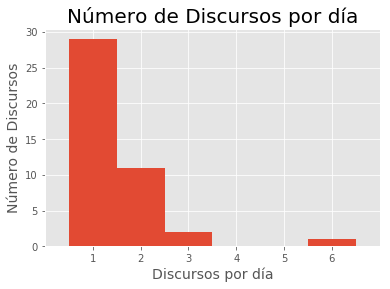

In [30]:
by_date = discursos_base['Fecha'].value_counts()
plt.style.use('ggplot')
by_date.plot.hist(bins=range(1,9), align='left')
plt.xticks(range(1,7))
plt.xlim(0, 7)
plt.title("Número de Discursos por día", fontdict={'fontsize': 20})
plt.ylabel("Número de Discursos", fontdict={'fontsize': 14})
plt.xlabel("Discursos por día", fontdict={'fontsize': 14});
plt.savefig('hist_daily_discursos.png')

## Gráficos Discursos Dia - Mes

In [31]:
# Dia con metodo datetime
discursos_base['Dia'] = discursos_base['Fecha'].dt.dayofweek

# Creando diccionario con los dias de la semana
days = {0:'Lunes',1:'Martes',2:'Miércoles',3:'Jueves',4:'Viernes',5:'Sábado',6:'Domingo'}

# Para cada valor en dia de la semana
discursos_base['Dia'] = discursos_base['Dia'].apply(lambda x: days[x])

In [32]:
# Ordenar

discursos_base['Dia'] = \
    pd.Categorical(discursos_base['Dia'], ['Lunes','Martes','Miércoles','Jueves','Viernes','Sábado','Domingo'])

In [33]:
by_weekday = discursos_base['Dia'].value_counts().sortlevel()
by_weekday

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: sortlevel is deprecated, use sort_index(level=...)
  """Entry point for launching an IPython kernel.


Lunes        11
Martes       19
Miércoles    14
Jueves        9
Viernes       8
Sábado        2
Domingo       0
Name: Dia, dtype: int64

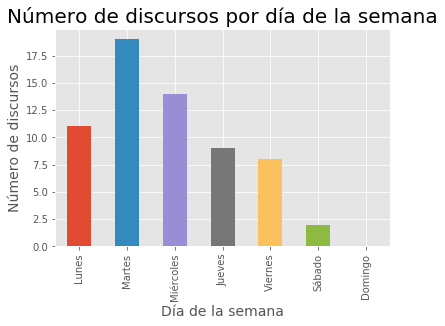

In [34]:
# Grafico dia de la semana

by_weekday.plot.bar()
plt.title("Número de discursos por día de la semana", fontdict={'fontsize': 20})
plt.ylabel("Número de discursos", fontdict={'fontsize': 14})
plt.xlabel("Día de la semana", fontdict={'fontsize': 14});
plt.savefig('bar_weekday_discursos.png')

In [35]:
# Contando por mes

by_month = discursos_base['Mes'].value_counts().sort_index()
by_month

1    10
2     4
3    13
4    22
5    14
Name: Mes, dtype: int64

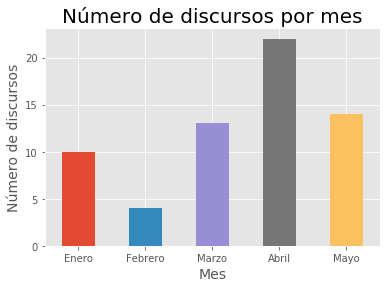

In [36]:
by_month.plot.bar()
plt.title("Número de discursos por mes", fontdict={'fontsize': 20})
plt.ylabel("Número de discursos", fontdict={'fontsize': 14})
plt.xlabel("Mes", fontdict={'fontsize': 14})
labels = ['Enero','Febrero','Marzo','Abril','Mayo']
plt.xticks(range(5), labels, rotation='horizontal');
plt.savefig('bar_month_discursos.png')

## Grafico Discurso Dia

In [37]:
# agrupar por dis-mes

by_month_day= pd.groupby(discursos_base, by=[discursos_base['Fecha'].dt.month, discursos_base['Fecha'].dt.day])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.groupby() is deprecated and will be removed; Please use the Series.groupby() or DataFrame.groupby() methods
  This is separate from the ipykernel package so we can avoid doing imports until


In [38]:
day_labels = ['01-01','02-01','03-01','04-01','05-01','06-01','07-01','08-01','09-01','10-01','11-01',\
              '12-01','13-01','14-01','15-01','16-01','17-01','18-01','19-01','20-01','21-01','22-01',\
              '23-01','24-01','25-01','26-01','27-01','28-01','29-01','30-01','31-05',\
              '01-02','02-02','03-02','04-02','05-02','06-02','07-02','08-02','09-02','10-02','11-02',\
              '12-02','13-02','14-02','15-02','16-02','17-02','18-02','19-02','20-02','21-02','22-02',\
              '23-02','24-02','25-02','26-02','27-02','28-02',\
              '01-03','02-03','03-03','04-03','05-03','06-03','07-03','08-03','09-03','10-03','11-03',\
              '12-03','13-03','14-03','15-03','16-03','17-03','18-03','19-03','20-03','21-03','22-03',\
              '23-03','24-03','25-03','26-03','27-03','28-03','29-03','30-03','31-03',\
              '01-04','02-04','03-04','04-04','05-04', '06-04','07-04','08-04','09-04','10-04','11-04',\
              '12-04','13-04','14-04','15-04','16-04','17-04','18-04','19-04','20-04','21-04','22-04',\
              '23-04','24-04','25-04','26-04','27-04','28-04','29-04','30-04','01-05','02-05','03-05',\
              '04-05','05-05','06-05','07-05','08-05','09-05','10-05','11-05','12-05','13-05','14-05',\
              '15-05','16-05','17-05','18-05','19-05','20-05','21-05','22-05']

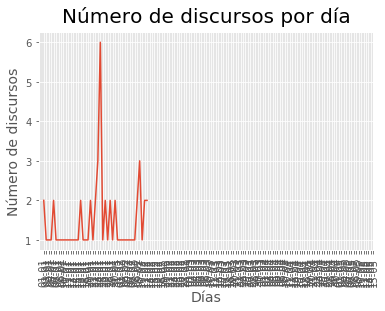

In [39]:
by_day = by_month_day['Dia'].agg('count')
by_day.plot()
plt.title("Número de discursos por día", fontdict={'fontsize': 20,\
                                                                                'verticalalignment': 'bottom'})
plt.ylabel("Número de discursos", fontdict={'fontsize': 14})
plt.xlabel("Días", fontdict={'fontsize': 14})
labels = day_labels
plt.xticks(range(135), labels, rotation='vertical')
plt.savefig('line_month_discursos.png')

## Word Cloud

In [40]:
# Unir los discursos

todos_los_discursos = discursos_base.sin_punt.str.cat(sep=';')

In [41]:
# Agregando caracteres especiales

punctuation = string.punctuation + '–¡¿”“•\r´'
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~–¡¿”“•\r´'

In [42]:
# Strip punctuation from string

def no_punct(string):
    transtable = string.maketrans('', '', punctuation)
    return string.translate(transtable)

In [43]:
# Quitando la puntuación en los strings

todos_los_discursos = no_punct(todos_los_discursos)

In [44]:
# Minusculas

todos_los_discursos = todos_los_discursos.lower()

In [45]:
len(todos_los_discursos)

263920

In [46]:
#Texto en tokens

todos_los_discursos_tokens = word_tokenize(todos_los_discursos)

In [47]:
# Eliminando stopwords en Portugues

def no_stopwords(tokens):
    return [w for w in tokens if w not in stopwords_prt]


In [48]:
# seleccionar stopwords en portugues

stopwords_prt = stopwords.words('portuguese')

In [49]:
print(stopwords_prt)

['de', 'a', 'o', 'que', 'e', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estivermos

In [50]:
# Drop stopwords

todos_los_discursos_tokens = no_stopwords(todos_los_discursos_tokens)

In [51]:
len(todos_los_discursos)

263920

In [52]:
len(set(todos_los_discursos))

53

In [53]:
# See sorted frequency distribution of all tokens

nltk.FreqDist(todos_los_discursos_tokens).most_common()

[('é', 606),
 ('brasil', 451),
 ('aqui', 322),
 ('todos', 206),
 ('senhores', 173),
 ('bem', 133),
 ('lá', 127),
 ('grande', 123),
 ('então', 117),
 ('deus', 115),
 ('ser', 110),
 ('porque', 102),
 ('governo', 94),
 ('mundo', 93),
 ('obrigado', 91),
 ('momento', 91),
 ('prezado', 90),
 ('povo', 90),
 ('estado', 86),
 ('presidente', 85),
 ('ministro', 83),
 ('agora', 81),
 ('israel', 81),
 ('país', 80),
 ('tudo', 78),
 ('anos', 73),
 ('cada', 72),
 ('ter', 72),
 ('lado', 69),
 ('militar', 68),
 ('quero', 68),
 ('pouco', 68),
 ('questão', 68),
 ('fazer', 67),
 ('vez', 67),
 ('gente', 67),
 ('ministros', 66),
 ('certeza', 66),
 ('senhor', 65),
 ('queremos', 64),
 ('todo', 63),
 ('nesse', 62),
 ('exército', 62),
 ('parte', 61),
 ('onde', 60),
 ('senhoras', 59),
 ('estados', 59),
 ('hoje', 58),
 ('frente', 58),
 ('brasileiro', 57),
 ('trabalho', 56),
 ('dia', 56),
 ('sempre', 56),
 ('primeiro', 53),
 ('vamos', 53),
 ('realmente', 51),
 ('vai', 51),
 ('muita', 51),
 ('obviamente', 50),
 ('ou

In [54]:
palabras_interes = ('brasil','deus','governo','povo','ministro','militar','brasileiro','trabalho','economía','arma',\
                    'segurança', 'comunismo','socialismo','lula', 'poder', 'justiça', 'venezuela','educação','religião',\
                     "pt",'emprego','nacional','país','impostos','corrupção')

In [55]:
len(palabras_interes)

25

In [56]:
# Filtro token lista de interes

tokens_de_interes = [w for w in todos_los_discursos_tokens if w in palabras_interes]

In [57]:
# Uninendo lista

tokens_of_interest_str = ' '.join(tokens_de_interes)

In [58]:
fdist = nltk.FreqDist(tokens_de_interes)

In [59]:
fdist.most_common()

[('brasil', 451),
 ('deus', 115),
 ('governo', 94),
 ('povo', 90),
 ('ministro', 83),
 ('país', 80),
 ('militar', 68),
 ('brasileiro', 57),
 ('trabalho', 56),
 ('educação', 29),
 ('segurança', 27),
 ('poder', 26),
 ('venezuela', 25),
 ('arma', 18),
 ('nacional', 14),
 ('corrupção', 9),
 ('justiça', 6),
 ('religião', 4),
 ('impostos', 4),
 ('socialismo', 3),
 ('emprego', 3),
 ('pt', 3),
 ('lula', 3),
 ('comunismo', 1)]

In [60]:
def col_counter(list_of_words, word):
    counter = Counter(w for w in list_of_words if w in word)
    return counter[word]

In [61]:
discursos_base['brasil'] = [col_counter(discursos_base['no_stopwords'][i], 'brasil') for i in range(len(discursos_base['no_stopwords']))]

In [62]:
discursos_base['deus'] = [col_counter(discursos_base['no_stopwords'][i], 'deus') for i in range(len(discursos_base['no_stopwords']))]

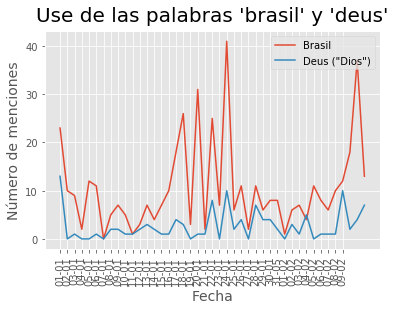

In [63]:
brasil_by_day = by_month_day['brasil'].agg('sum')
deus_by_day = by_month_day['deus'].agg('sum')

brasil_by_day.plot()
deus_by_day.plot()

plt.title("Use de las palabras 'brasil' y 'deus'", fontdict={'fontsize': 20,\
                                                                                'verticalalignment': 'bottom'})
plt.ylabel("Número de menciones", fontdict={'fontsize': 14})
plt.xlabel("Fecha", fontdict={'fontsize': 14})
labels = day_labels
plt.xticks(range(40), labels, rotation='vertical')
plt.legend(['Brasil', 'Deus ("Dios")'], loc='upper right');
plt.savefig('brasil_governo_day.png')

In [64]:
discursos_base['brasileiro'] = [col_counter(discursos_base['no_stopwords'][i], 'brasileiro') for i in range(len(discursos_base['no_stopwords']))]

In [65]:
discursos_base['emprego'] = [col_counter(discursos_base['no_stopwords'][i], 'emprego') for i in range(len(discursos_base['no_stopwords']))]

In [66]:
discursos_base['segurança'] = [col_counter(discursos_base['no_stopwords'][i], 'segurança') for i in range(len(discursos_base['no_stopwords']))]

In [67]:
discursos_base['arma'] = [col_counter(discursos_base['no_stopwords'][i], 'arma') for i in range(len(discursos_base['no_stopwords']))]

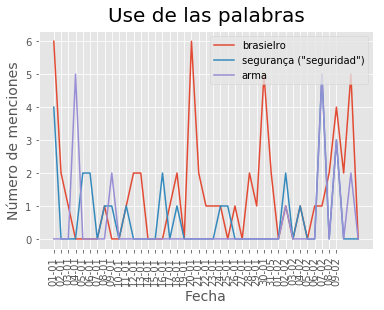

In [68]:
brasileiro_by_day = by_month_day['brasileiro'].agg('sum')
segurança_by_day = by_month_day['segurança'].agg('sum')
arma_by_day = by_month_day['arma'].agg('sum')





brasileiro_by_day.plot()
segurança_by_day.plot()
arma_by_day.plot()





plt.title("Use de las palabras", fontdict={'fontsize': 20,\
                                                                                'verticalalignment': 'bottom'})
plt.ylabel("Número de menciones", fontdict={'fontsize': 14})
plt.xlabel("Fecha", fontdict={'fontsize': 14})
labels = day_labels
plt.xticks(range(40), labels, rotation='vertical')
plt.legend(['brasielro', 'segurança ("seguridad")','arma', 'emprego ("empleo")','religião ("religión")'], loc='upper right');
plt.savefig('palabras.png')

In [69]:
discursos_base['governo'] = [col_counter(discursos_base['no_stopwords'][i], 'governo') for i in range(len(discursos_base['no_stopwords']))]

In [70]:
discursos_base['povo'] = [col_counter(discursos_base['no_stopwords'][i], 'povo') for i in range(len(discursos_base['no_stopwords']))]

In [71]:
discursos_base['ministro'] = [col_counter(discursos_base['no_stopwords'][i], 'ministro') for i in range(len(discursos_base['no_stopwords']))]

In [72]:
discursos_base['trabalho'] = [col_counter(discursos_base['no_stopwords'][i], 'trabalho') for i in range(len(discursos_base['no_stopwords']))]

In [73]:
discursos_base['economía'] = [col_counter(discursos_base['no_stopwords'][i], 'economía') for i in range(len(discursos_base['no_stopwords']))]

In [74]:
discursos_base['poder'] = [col_counter(discursos_base['no_stopwords'][i], 'poder') for i in range(len(discursos_base['no_stopwords']))]

In [75]:
discursos_base['justiça'] = [col_counter(discursos_base['no_stopwords'][i], 'justiça') for i in range(len(discursos_base['no_stopwords']))]

In [76]:
discursos_base['religião'] = [col_counter(discursos_base['no_stopwords'][i], 'religião') for i in range(len(discursos_base['no_stopwords']))]

In [77]:
discursos_base['socialismo'] = [col_counter(discursos_base['no_stopwords'][i], 'socialismo') for i in range(len(discursos_base['no_stopwords']))]

In [78]:
discursos_base['pt'] = [col_counter(discursos_base['no_stopwords'][i], 'pt') for i in range(len(discursos_base['no_stopwords']))]

In [79]:
discursos_base['lula'] = [col_counter(discursos_base['no_stopwords'][i], 'lula') for i in range(len(discursos_base['no_stopwords']))]

In [80]:
discursos_base['comunismo'] = [col_counter(discursos_base['no_stopwords'][i], 'comunismo') for i in range(len(discursos_base['no_stopwords']))]

In [81]:
discursos_base['nacional'] = [col_counter(discursos_base['no_stopwords'][i], 'nacional') for i in range(len(discursos_base['no_stopwords']))]

In [82]:
discursos_base['país'] = [col_counter(discursos_base['no_stopwords'][i], 'país') for i in range(len(discursos_base['no_stopwords']))]

In [83]:
discursos_base['educação'] = [col_counter(discursos_base['no_stopwords'][i], 'educação') for i in range(len(discursos_base['no_stopwords']))]

In [84]:
discursos_base['impostos'] = [col_counter(discursos_base['no_stopwords'][i], 'impostos') for i in range(len(discursos_base['no_stopwords']))]

In [85]:
discursos_base['corrupção'] = [col_counter(discursos_base['no_stopwords'][i], 'corrupção') for i in range(len(discursos_base['no_stopwords']))]

In [86]:
discursos_base['venezuela'] = [col_counter(discursos_base['no_stopwords'][i], 'venezuela') for i in range(len(discursos_base['no_stopwords']))]

In [87]:
discursos_base['militar'] = [col_counter(discursos_base['no_stopwords'][i], 'militar') for i in range(len(discursos_base['no_stopwords']))]

In [88]:
governo_by_day = by_month_day['governo'].agg('sum')
povo_by_day = by_month_day['povo'].agg('sum')
ministro_by_day = by_month_day['ministro'].agg('sum')
emprego_by_day = by_month_day['emprego'].agg('sum')
trabalho_by_day = by_month_day['trabalho'].agg('sum')
economia_by_day = by_month_day['economía'].agg('sum')
poder_by_day = by_month_day['poder'].agg('sum')
justiça_by_day = by_month_day['justiça'].agg('sum')
religião_by_day = by_month_day['religião'].agg('sum')
socialismo_by_day = by_month_day['socialismo'].agg('sum')
pt_by_day = by_month_day['pt'].agg('sum')
lula_by_day = by_month_day['lula'].agg('sum')
comunismo_by_day = by_month_day['comunismo'].agg('sum')
nacional_by_day = by_month_day['nacional'].agg('sum')
pais_by_day = by_month_day['país'].agg('sum')
educação_by_day = by_month_day['educação'].agg('sum')
impostos_by_day = by_month_day['impostos'].agg('sum')
corrupção_by_day = by_month_day['corrupção'].agg('sum')
venezuela_by_day = by_month_day['venezuela'].agg('sum')
militar_by_day = by_month_day['militar'].agg('sum')

In [89]:
totals_by_topic = discursos_base.iloc[:,15:].sum()
totals_by_topic = totals_by_topic.sort_values(ascending=False)
totals_by_topic

brasil        454
deus          115
governo        94
povo           90
ministro       83
país           81
militar        68
brasileiro     57
trabalho       56
educação       29
segurança      27
poder          26
venezuela      25
arma           18
nacional       14
corrupção       9
justiça         6
impostos        4
religião        4
lula            3
emprego         3
socialismo      3
pt              3
comunismo       1
economía        0
dtype: int64

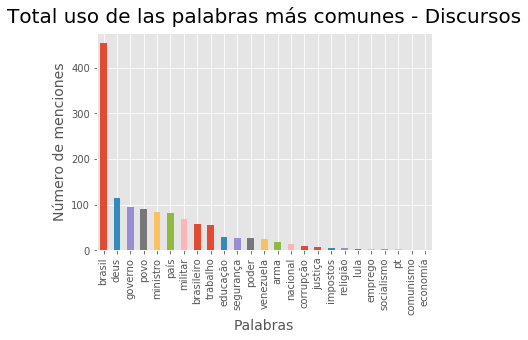

In [90]:
totals_by_topic.plot(kind='bar')

plt.title("Total uso de las palabras más comunes - Discursos", fontdict={'fontsize': 20,\
                                                                                'verticalalignment': 'bottom'})
plt.ylabel("Número de menciones", fontdict={'fontsize': 14})
plt.xlabel("Palabras", fontdict={'fontsize': 14})
plt.savefig("topics_total_dis.png")


## Collocations

In [91]:
all_discursos_Text = nltk.Text(todos_los_discursos_tokens)
all_discursos_Text

<Text: excelentíssimo presidente congresso nacional senador eunício oliveira senhoras...>

In [92]:
all_discursos_Text.collocations(num = 50)

estados unidos; forças armadas; marcos pontes; vossa excelência;
agulhas negras; paulo guedes; acima tudo; toda certeza; ciência
tecnologia; rio janeiro; cada vez; colégio militar; militar agulhas;
academia militar; senhoras senhores; grande parte; meio ambiente;
senhores senhoras; exército brasileiro; reforma previdência; muita
coisa; assim sendo; nesse sentido; arma fogo; rodrigo maia; deus
acima; augusto heleno; contemporâneo academia; joão 832; benjamin
netanyahu; momentos difíceis; viés ideológico; medida provisória;
tereza cristina; riquezas minerais; local destaque; minas energia;
todo respeito; américa sul; nessa área; quero agradecer; crime
organizado; estar vivo; almirante bento; destaque merece; ministro
defesa; horário verão; dar certo; todo mundo; afinal contas


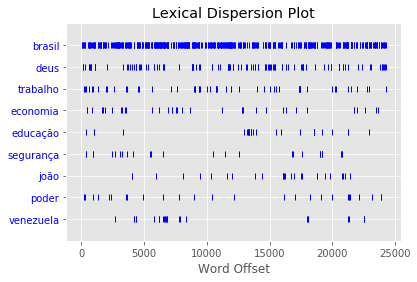

In [93]:
all_discursos_Text.dispersion_plot(["brasil", "deus", "trabalho","economia","educação","segurança","joão","poder","venezuela"])

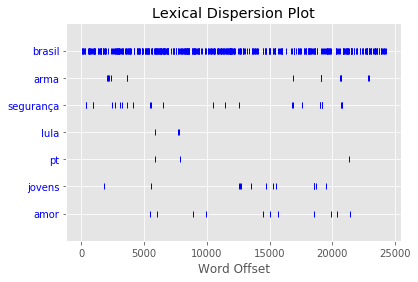

In [94]:
all_discursos_Text.dispersion_plot(["brasil","arma","segurança","lula","pt","jovens","amor"])

In [95]:
all_discursos_Text.concordance('brasil', width = 100)

Displaying 25 of 451 matches:
 presenças vicepresidente república federativa brasil hamilton mourão contemporâneo academia militar
odrigo maia expresidentes república federativa brasil senhor josé sarney senhor fernando collor mell
 casa deputado presidente república federativa brasil mandato mim confiado vontade soberana povo bra
sileiros confiaram mim honrosa missão governar brasil neste período grandes desafios tempo enorme es
 combater ideologia gênero conservando valores brasil voltará ser país livre amarras ideológicas pre
ma progressiva responsável consciente brasília brasil poder central estados municípios campanha elei
tendeu chamado ruas forjou compromisso colocar brasil acima tudo deus acima todos inimigos pátria or
gislativo judiciário busca novos caminhos novo brasil prioridades é proteger revigorar democracia br
onômica história hoje começamos trabalho árduo brasil inicie novo capítulo história capítulo brasil 
 brasil inicie novo capítulo história capítulo brasil visto p

In [96]:
all_discursos_Text.concordance('deus', width = 100)

Displaying 25 of 115 matches:
rasileiros brasileiras primeiro quero agradecer deus estar vivo mãos profissionais santa casa juiz o
 casa juiz operaram verdadeiro milagre obrigado deus humildade volto casa onde 28 anos empenhei serv
fortalecido emocionado profundamente agradecido deus vida brasileiros confiaram mim honrosa missão g
as forjou compromisso colocar brasil acima tudo deus acima todos inimigos pátria ordem liberdade ten
nalto missão representar povo brasileiro benção deus apoio família força povo brasileiro trabalharei
todos queremos obrigado todos brasil acima tudo deus acima todosmeu prezado general paula esposa mom
ir pátria chefe executivo sendo possível porque deus preservou vida acreditaram mim juntos fazer bra
ncípios estado democrático guiados constituição deus coração partir hoje vamos colocar prática proje
s minerais abundantes terras férteis abençoadas deus povo maravilhoso grande nação reconstruir farem
toda dedicação construir brasil sonhos agradeço deus estar vi

In [97]:
all_discursos_Text.concordance('segurança', width = 100)

Displaying 25 of 27 matches:
vamos honrar valorizar sacrificam vidas nome segurança segurança familiares contamos apoio congress
ar valorizar sacrificam vidas nome segurança segurança familiares contamos apoio congresso nacional
s leva insegurança todos lugares preocupação segurança pessoas bem garantia direito propriedade leg
valorizar dar respaldo trabalho todas forças segurança primeira vez brasil irá priorizar educação b
inistração pública enfrentando desafios área segurança conversas nesta manhã daremos prosseguimento
ançando rumo certo rumo democracia liberdade segurança desenvolvimento obrigado senhor presidente m
mbate lavagem dinheiro vamos investir pesado segurança visitem famílias pois países primeiros belez
eliminar práticas desleais comércio garantir segurança jurídica trocas comerciais internacionais va
alhálos melhor estará lado possam ter devida segurança jurídica poder plantar produzir muitas medid
izarmos objetivo quero nome ministro justiça segurança sérgio moro agra

In [98]:
all_discursos_Text.concordance('armas', width = 100)

Displaying 9 of 9 matches:
rtarias negarlhes direito povo decidiu comprar armas munições podemos negar povo quis naquele momen
legislação anterior poderia comprar meia dúzia armas prática poderia comprar nenhuma então difícil 
dadão bem toda certeza poderá fazer uso dessas armas possibilidade ainda bem costurado ministro sér
bem costurado ministro sérgio moro sim comprar armas tendo vista número propriedades rurais exemplo
 pode comprovando então obter maior quantidade armas questão recadastramento tratado futuramente ta
araguaias dado combate tréguas flagelo tráfico armas drogas contrabando lavagem dinheiro atuado apr
 alegria sorriso vezes jovem adentrou carreira armas cheio esperança cheio sonhos vezes gente olha 
a é outra acho pessoal gostou parte aí decreto armas toda certeza pedro apresentou aí algumas propo
mbater daí acreditar ser humano assino decreto armas quero dar senhores senhoras direito conquistar


In [99]:
all_discursos_Text.concordance('trabalho', width = 100)

Displaying 25 of 56 matches:
voz povo alcançaremos êxito objetivos exemplo trabalho levaremos futuras gerações seguir nesta taref
 boas escolas capazes preparar filhos mercado trabalho militância política sonham liberdade ir vir s
al dar respaldo jurídico policiais realizarem trabalho merecem devem ser respeitados forças armadas 
ética moral econômica história hoje começamos trabalho árduo brasil inicie novo capítulo história ca
vida melhor melhores condições usufruir fruto trabalho meritocracia governo cabe ser honesto eficien
a defesa compromisso é valorizar dar respaldo trabalho todas forças segurança primeira vez brasil ir
 quer respeito quer ordem quer progresso todo trabalho longo quatro anos verdade comecei andar brasi
ar questões imprensa possa cada vez fazer bom trabalho brasil questão ongs parece importância sim re
aída crise econômica fazer população acredite trabalho porque assim poderemos realmente ser felizes 
 uruguai aperfeiçoar bloco propor nova agenda trabalho sempre 